- The model used here was generated in BinnedGensimModelGeneration.ipynb 
- Our RegenX paper binned the research papers into time periods based on when they were written. We used our gensim model with lemmatization and *not* filtering out stopwords and trained individual models across each binned time period. We then tried to characterize trends across the years. 

In [1]:
import gensim 
import glob
import matplotlib.pyplot as plt
import math
import pandas as pd


# Single Word Comparisons over Time Periods

In [11]:
project_base_path = "/content/drive/MyDrive/Colab Notebooks/NLP - Lab/Optic Nerve Regeneration/" 

In [ ]:
MODEL_PATH_WITHOUT_STOP = project_base_path + "Code/Word Embeddings/Generated Models/Gensim_Lemmatized_Without_Stopwords/"
time_per_list = ['1776-1832', '1835-1846', '1847-1859', '1860-1872', '1874-1884', '1885-1894', '1895-1902', '1903-1910', '1911-1918', '1919-1926', '1927-1935', '1936-1943', '1944-1974', '1977-1988', '1989-1996', '1997-2015']
model_files_without_stop = glob.glob(MODEL_PATH_WITHOUT_STOP + "*.wordvectors")
model_files_without_stop

In [ ]:
MODEL_PATH_WITH_STOP = project_base_path + "Code/Word Embeddings/Generated Models/Gensim_Lemmatized/"
time_per_list = ['1776-1832', '1835-1846', '1847-1859', '1860-1872', '1874-1884', '1885-1894', '1895-1902', '1903-1910', '1911-1918', '1919-1926', '1927-1935', '1936-1943', '1944-1974', '1977-1988', '1989-1996', '1997-2015']
model_files_with_stop = glob.glob(MODEL_PATH_WITH_STOP + "*.wordvectors")
model_files_with_stop

In [14]:
# eye
# muscle 
# animal

# Analysis

In [ ]:
word_to_compare="animal"
topn=10

In [ ]:
df_with_stopwords = pd.DataFrame()

for i, model_path in enumerate(model_files_without_stop):
  print(time_per_list[i])
  wv = gensim.models.KeyedVectors.load(model_path, mmap='r')
  try:
    similar_words = wv.most_similar(word_to_compare, topn=topn)
    df_with_stopwords[time_per_list[i]] = [word[0] for word in similar_words]
    for word in similar_words:
      print("\t" + word[0])
  except KeyError:
    print("\tWord not in vocabulary")
    df_with_stopwords[time_per_list[i]] = ['Word Not Found'] * topn

df_with_stopwords

In [ ]:
df_without_stopwords = pd.DataFrame()

for i, model_path in enumerate(model_files_with_stop):
  print(time_per_list[i])
  wv = gensim.models.KeyedVectors.load(model_path, mmap='r')
  try:
    similar_words = wv.most_similar(word_to_compare, topn=topn)
    df_without_stopwords[time_per_list[i]] = [word[0] for word in similar_words]
    for word in similar_words:
      print("\t" + word[0])
  except KeyError:
    print("\tWord not in vocabulary")
    df_without_stopwords[time_per_list[i]] = ['Word Not Found'] * topn

df_without_stopwords

In [ ]:
df_without_stopwords

In [ ]:
df_with_stopwords

# Similarity between two words over time periods

In [15]:
# https://radimrehurek.com/gensim/models/keyedvectors.html#module-gensim.models.keyedvectors
# injury, cell 
# regeneration, stem 
# retina, nucleus 
# axon, sheath
# nerve, rat 

In [16]:
word_to_compare = "neuron"
word_to_compare_two = "axon"

1776-1832
	Word not in vocabulary
1835-1846
	Word not in vocabulary
1847-1859
	Word not in vocabulary
1860-1872
	Word not in vocabulary
1874-1884
	Word not in vocabulary
1885-1894
	Word not in vocabulary
1895-1902
	0.096893914
1903-1910
	0.40131304
1911-1918
	0.124839954
1919-1926
	0.5587816
1927-1935
	0.22594473
1936-1943
	0.57185215
1944-1974
	0.21422468
1977-1988
	0.3261864
1989-1996
	0.3682671
1997-2015
	0.5718344


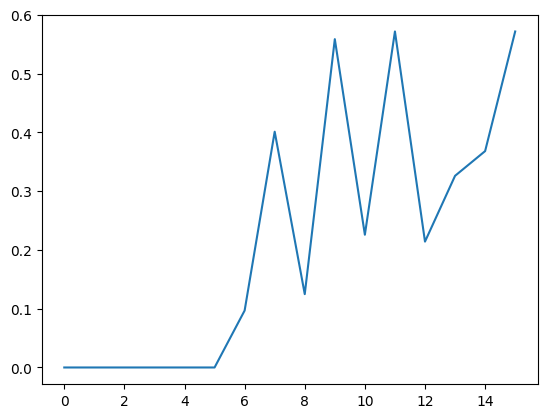

In [18]:
similarity_arr = [] 
for i, model_path in enumerate(model_files_without_stop):
  print(time_per_list[i])
  wv = gensim.models.KeyedVectors.load(model_path, mmap='r')
  try:
    similarity = wv.similarity(word_to_compare, word_to_compare_two)
    similarity_arr.append(abs(similarity))
    print("\t" + str(similarity))
  except KeyError:
    print("\tWord not in vocabulary")
    similarity_arr.append(0) 

plt.plot(similarity_arr) 

similarity_arr = [] 
for i, model_path in enumerate(model_files_with_stop):
  print(time_per_list[i])
  wv = gensim.models.KeyedVectors.load(model_path, mmap='r')
  try:
    similarity = wv.similarity(word_to_compare, word_to_compare_two)
    similarity_arr.append(abs(similarity))
    print("\t" + str(similarity))
  except KeyError:
    print("\tWord not in vocabulary")
    similarity_arr.append(0) 

plt.plot(similarity_arr) 
plt.show()

# Ranking words over time period

In [ ]:
wv = gensim.models.KeyedVectors.load(model_files[0], mmap='r')
print(wv.rank("eye", "retina"))
wv.most_similar("eye", topn=25)

25


[('object', 0.4580807685852051),
 ('thalamus', 0.4443158209323883),
 ('insensibility', 0.4242132604122162),
 ('toward', 0.4239126741886139),
 ('vision', 0.4135281443595886),
 ('situated', 0.3955168128013611),
 ('nerve', 0.38126111030578613),
 ('case', 0.38077056407928467),
 ('of', 0.37937307357788086),
 ('side', 0.37234005331993103),
 ('similarly', 0.36442112922668457),
 ('fibre', 0.35639816522598267),
 ('sympathy', 0.35616520047187805),
 ('owing', 0.35365331172943115),
 ('undergone', 0.3489152491092682),
 ('axis', 0.3489014506340027),
 ('jects', 0.34678077697753906),
 ('center', 0.34579163789749146),
 ('source', 0.34012728929519653),
 ('blindness', 0.3396413326263428),
 ('spot', 0.33741137385368347),
 ('tlie', 0.33289653062820435),
 ('want', 0.33254796266555786),
 ('inference', 0.3284497857093811),
 ('retina', 0.32793521881103516)]